In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
filtered_df = df[['carat', 'cut', 'price']]
filtered_df

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335
...,...,...,...
53935,0.72,Ideal,2757
53936,0.72,Good,2757
53937,0.70,Very Good,2757
53938,0.86,Premium,2757


**Relation between 'carat' and 'price'**

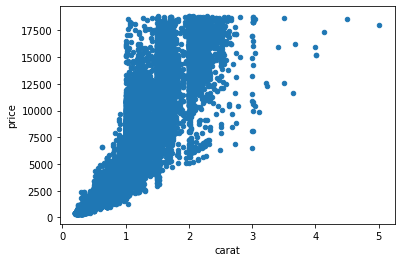

In [10]:
filtered_df.plot.scatter(x="carat", y="price")

**Box plotting about 'carat' and 'price' by 'cut' method**

In [91]:
map_group = filtered_df.groupby(by='cut').groups
# ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
key_group = list(map_group.keys())

def parse(index):
  group_name = key_group[index]
  result = filtered_df.iloc[map_group.get(group_name)][['carat', 'price']]
  result = result.rename(columns={'carat': f'carat_{group_name}', 'price': f'price_{group_name}'})
  return result.reset_index()

groups = list(map(parse, range(len(key_group))))
group_ideal, group_premium, group_very_good, group_good, group_fair = groups

group_ideal

,index,carat_Ideal,price_Ideal
0,0,0.23,326
1,11,0.23,340
2,13,0.31,344
3,16,0.30,348
4,39,0.33,403
...,...,...,...
21546,53925,0.79,2756
21547,53926,0.71,2756
21548,53929,0.71,2756
21549,53935,0.72,2757


In [93]:
group_ideal.describe()

,index,carat_Ideal,price_Ideal
count,21551.000000,21551.000000,21551.000000
mean,29046.630736,0.702837,3457.541970
std,15044.527014,0.432876,3808.401172
min,0.000000,0.200000,326.000000
25%,17015.000000,0.350000,878.000000
50%,31068.000000,0.540000,1810.000000
75%,41415.500000,1.010000,4678.500000
max,53939.000000,3.500000,18806.000000


In [88]:
def extract_col(df, attr): 
  cols = list(df.columns)
  col = list(filter(lambda col: col.startswith(attr), cols))[0]
  return df[col]

groups_carat = list(map(lambda group: extract_col(group, 'carat'), groups))
groups_price = list(map(lambda group: extract_col(group, 'price'), groups))

concat_carat = pd.concat(groups_carat, axis=1)
concat_price = pd.concat(groups_price, axis=1)

concat_carat.describe()

,carat_Ideal,carat_Premium,carat_Very Good,carat_Good,carat_Fair
count,21551.000000,13791.000000,12082.000000,4906.000000,1610.000000
mean,0.702837,0.891955,0.806381,0.849185,1.046137
std,0.432876,0.515262,0.459435,0.454054,0.516404
min,0.200000,0.200000,0.200000,0.230000,0.220000
25%,0.350000,0.410000,0.410000,0.500000,0.700000
50%,0.540000,0.860000,0.710000,0.820000,1.000000
75%,1.010000,1.200000,1.020000,1.010000,1.200000
max,3.500000,4.010000,4.000000,3.010000,5.010000


Box plot - carat

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


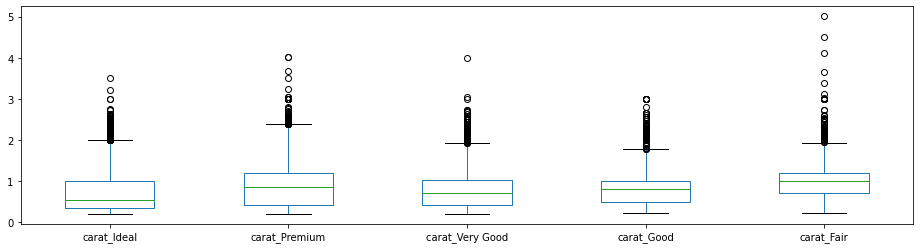

In [95]:
concat_carat.plot.box(figsize=(16, 4))

Box plot - price

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


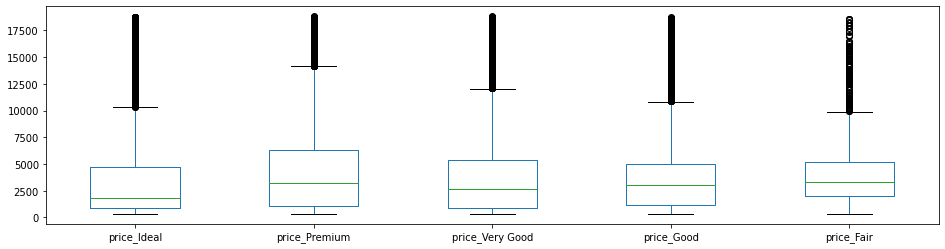

In [96]:
concat_price.plot.box(figsize=(16, 4))

**3D scatter flot about X, Y, Z**

In [5]:
coords = df[['x', 'y', 'z']]
coords

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


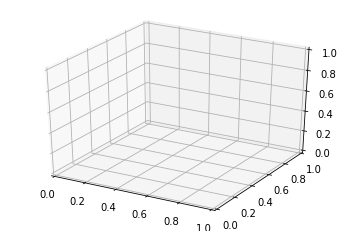

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

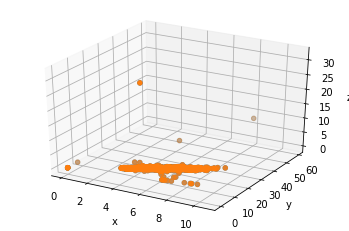

In [11]:
ax.scatter3D(coords['x'], coords['y'], coords['z'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig